In [1]:
"""
Cell Types and Metadata in HNN-Core Networks
=============================================

This notebook talks about the concept of cell types and metadata in HNN-Core networks,
serving as a foundation for understanding network structure.
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from hnn_core import jones_2009_model, simulate_dipole
from hnn_core.viz import plot_dipole

In [2]:
# Create the default Jones 2009 model
net = jones_2009_model()
print(f"Network created with {len(net.cell_types)} cell types")
print(f"Cell types: {list(net.cell_types.keys())}")

Network created with 4 cell types
Cell types: ['L2_basket', 'L2_pyramidal', 'L5_basket', 'L5_pyramidal']


In [3]:
# Each cell type in the network has associated metadata that describes its properties.
# Display metadata for all cell types
for cell_type_name, cell_type_data in net.cell_types.items():
    print(f"\n{cell_type_name}:")
    print("-" * 40)
    metadata = cell_type_data["cell_metadata"]
    for key, value in metadata.items():
        print(f"  {key}: {value}")


L2_basket:
----------------------------------------
  morpho_type: basket
  electro_type: inhibitory
  layer: 2
  measure_dipole: False
  reference: https://doi.org/10.7554/eLife.51214

L2_pyramidal:
----------------------------------------
  morpho_type: pyramidal
  electro_type: excitatory
  layer: 2
  measure_dipole: True
  reference: https://doi.org/10.7554/eLife.51214

L5_basket:
----------------------------------------
  morpho_type: basket
  electro_type: inhibitory
  layer: 5
  measure_dipole: False
  reference: https://doi.org/10.7554/eLife.51214

L5_pyramidal:
----------------------------------------
  morpho_type: pyramidal
  electro_type: excitatory
  layer: 5
  measure_dipole: True
  reference: https://doi.org/10.7554/eLife.51214


In [4]:
# The `filter_cell_types()` method allows us to find cell types based on specific
# metadata criteria. This is useful for understanding network organization

# Filter by morphological type
print("Pyramidal cells in the network:")
pyramidal_cells = net.filter_cell_types(morpho_type="pyramidal")
print(pyramidal_cells)
print(f"Number of pyramidal cell types: {len(pyramidal_cells)}")

print("\nBasket (inhibitory interneuron) cells in the network:")
basket_cells = net.filter_cell_types(morpho_type="basket")
print(basket_cells)
print(f"Number of basket cell types: {len(basket_cells)}")

# Filter by electrophysiological type
excitatory_cells = net.filter_cell_types(electro_type="excitatory")
inhibitory_cells = net.filter_cell_types(electro_type="inhibitory")

print("Excitatory cells:", excitatory_cells)
print("Inhibitory cells:", inhibitory_cells)

Pyramidal cells in the network:
['L2_pyramidal', 'L5_pyramidal']
Number of pyramidal cell types: 2

Basket (inhibitory interneuron) cells in the network:
['L2_basket', 'L5_basket']
Number of basket cell types: 2
Excitatory cells: ['L2_pyramidal', 'L5_pyramidal']
Inhibitory cells: ['L2_basket', 'L5_basket']


In [5]:
# Count cell instances
excitatory_count = sum(len(net.pos_dict[cell_type]) for cell_type in excitatory_cells)
inhibitory_count = sum(len(net.pos_dict[cell_type]) for cell_type in inhibitory_cells)

print(f"\nTotal excitatory cells: {excitatory_count}")
print(f"Total inhibitory cells: {inhibitory_count}")
print(f"E/I ratio: {excitatory_count/inhibitory_count:.2f}")


Total excitatory cells: 200
Total inhibitory cells: 70
E/I ratio: 2.86


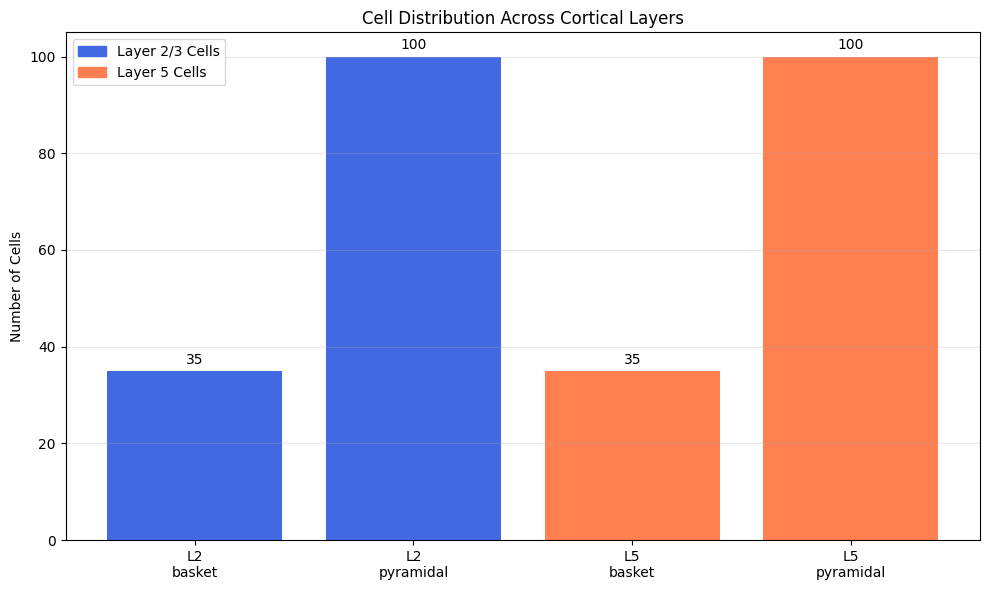

In [6]:
# Filter cell types by their cortical layer
layer2_cells = net.filter_cell_types(layer="2")
layer5_cells = net.filter_cell_types(layer="5")

# Combine all cell types into one list for plotting
all_cell_types = sorted(layer2_cells) + sorted(layer5_cells)
cell_counts = [len(net.pos_dict[cell]) for cell in all_cell_types]

# color mapping to distinguish layers
colors = []
for cell_type in all_cell_types:
    if 'L2' in cell_type:
        colors.append('royalblue')
    else:
        colors.append('coral')

plot_labels = [name.replace('_', '\n') for name in all_cell_types]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(plot_labels, cell_counts, color=colors)
ax.set_ylabel('Number of Cells')
ax.set_title('Cell Distribution Across Cortical Layers')
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

l2_patch = mpatches.Patch(color='royalblue', label='Layer 2/3 Cells')
l5_patch = mpatches.Patch(color='coral', label='Layer 5 Cells')
ax.legend(handles=[l2_patch, l5_patch])

plt.tight_layout()
plt.show()

In [7]:
# Filter cells that contribute to the dipole
dipole_cells = net.filter_cell_types(measure_dipole=True)
non_dipole_cells = net.filter_cell_types(measure_dipole=False)

print("Cells contributing to dipole signal:")
for cell_type in dipole_cells:
    print(f"  - {cell_type}")

print("\nCells NOT contributing to dipole signal:")
for cell_type in non_dipole_cells:
    print(f"  - {cell_type}")

Cells contributing to dipole signal:
  - L2_pyramidal
  - L5_pyramidal

Cells NOT contributing to dipole signal:
  - L2_basket
  - L5_basket


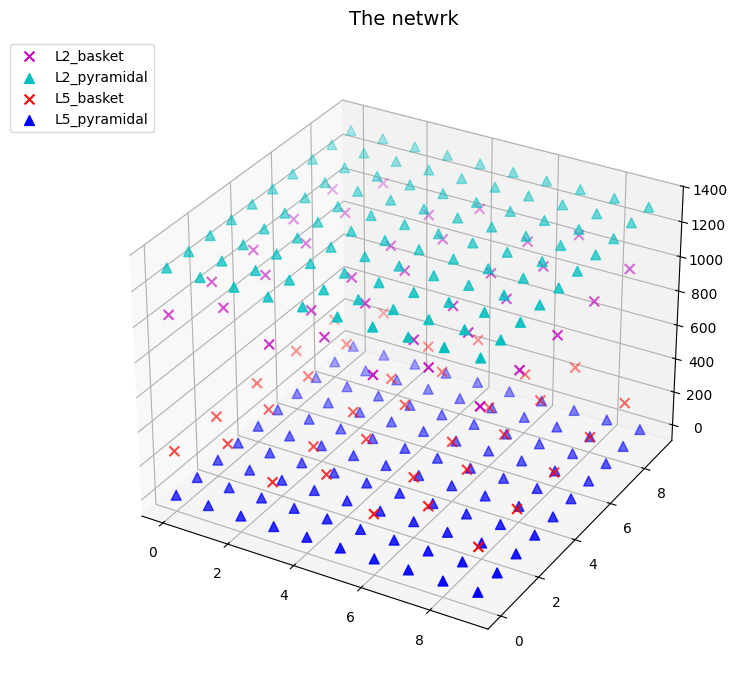

In [8]:
# Visualizing the Network Structure
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')
net.plot_cells(ax=ax1, show=False)
ax1.set_title('The netwrk', fontsize=14, pad=20)
plt.show()

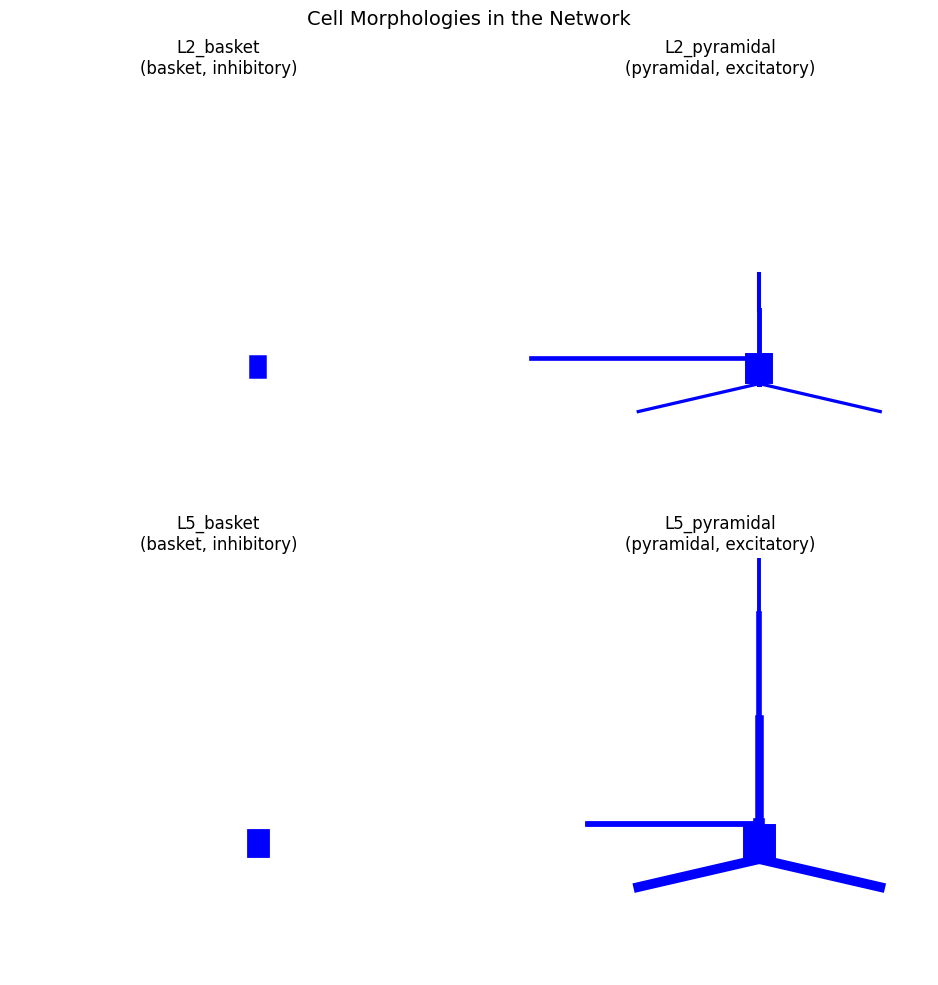

In [9]:
# Comparing the morphologies of different cell types
fig = plt.figure(figsize=(14, 10))

for idx, (cell_name, cell_data) in enumerate(net.cell_types.items()):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')  # Create 3D subplot
    cell_obj = cell_data["cell_object"]
    cell_obj.plot_morphology(ax=ax, show=False)
    ax.set_title(f'{cell_name}\n({cell_data["cell_metadata"]["morpho_type"]}, '
                 f'{cell_data["cell_metadata"]["electro_type"]})')
    
plt.suptitle('Cell Morphologies in the Network', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

In [10]:
# what about stuff like doing complex Filtering, when we need to use multiple criteria

# Find excitatory cells in Layer 2/3
l2_excitatory = net.filter_cell_types(layer="2", electro_type="excitatory")
print("Layer 2/3 excitatory cells:", l2_excitatory)

# Find inhibitory cells that don't contribute to dipole
inhibitory_non_dipole = net.filter_cell_types(
    electro_type="inhibitory", 
    measure_dipole=False
)
print("Inhibitory cells not contributing to dipole:", inhibitory_non_dipole)

Layer 2/3 excitatory cells: ['L2_pyramidal']
Inhibitory cells not contributing to dipole: ['L2_basket', 'L5_basket']


Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /home/zybander/projs/openSource/final_fresh/hnn-core/hnn_core/mod/x86_64/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...


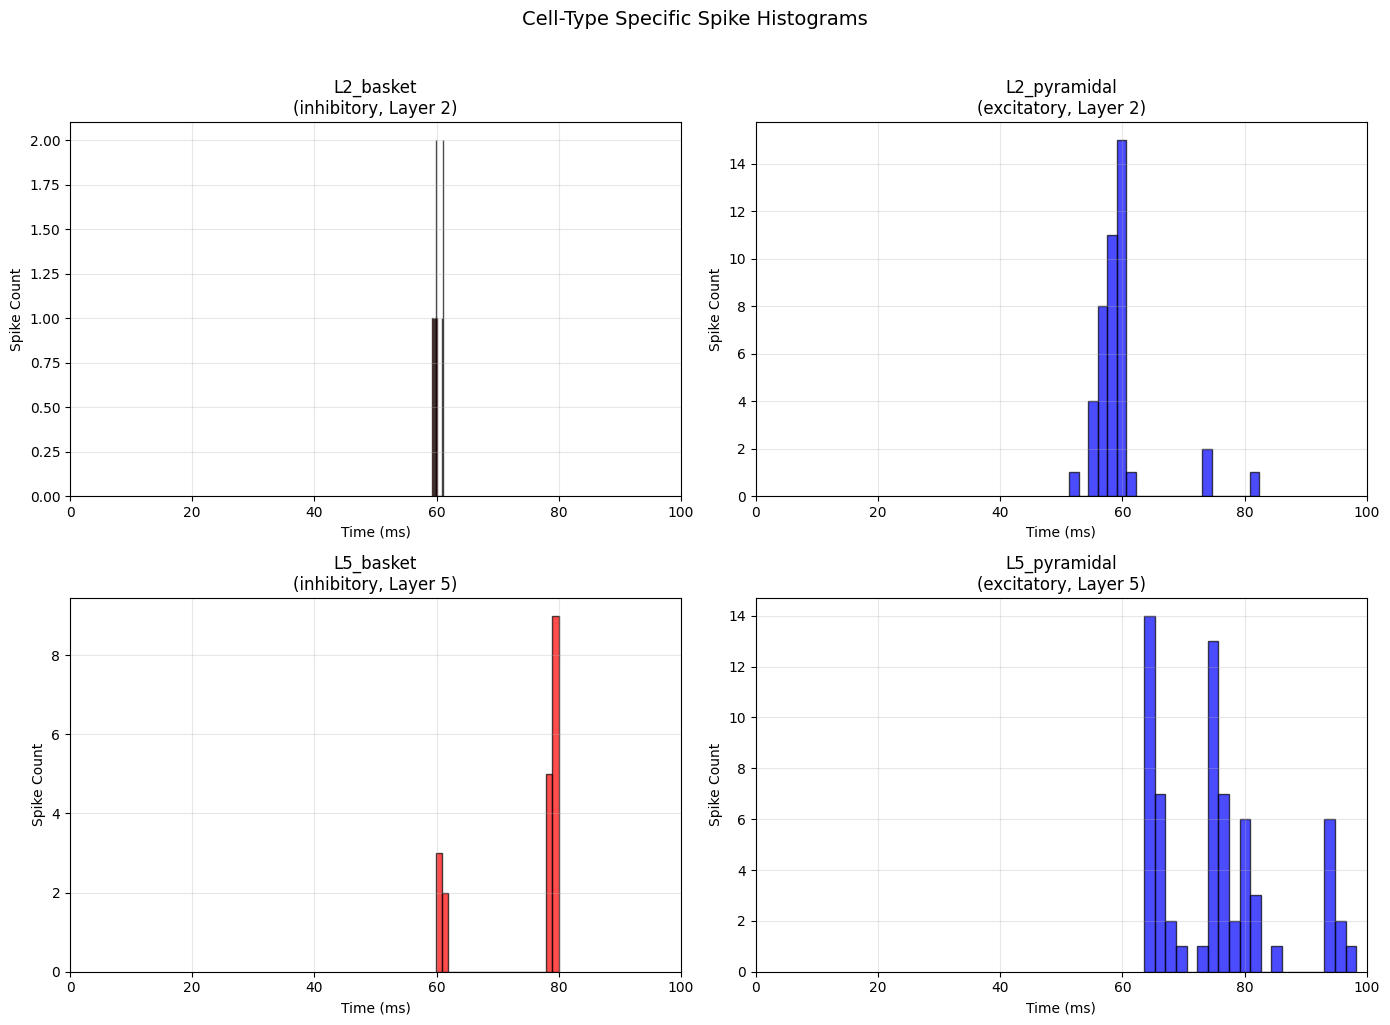

In [11]:
# Add a simple evoked drive to see cell-type specific responses
weights_ampa = {'L2_pyramidal': 0.001, 'L5_pyramidal': 0.001,
                'L2_basket': 0.0005, 'L5_basket': 0.0005}

net.add_evoked_drive(
    'test_drive', 
    mu=50.0, 
    sigma=5.0, 
    numspikes=1,
    weights_ampa=weights_ampa,
    location='proximal',
    event_seed=42
)

dpls = simulate_dipole(net, tstop=100., n_trials=1)

# from the above what if we want to see the Cell-Type Specific Activity Patterns
# firing patterns by cell type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# spike data
spike_times = net.cell_response.spike_times[0]
spike_gids = net.cell_response.spike_gids[0]
spike_types = net.cell_response.spike_types[0]

# histograms for each cell type
for idx, cell_type in enumerate(net.cell_types.keys()):
    ax = axes[idx // 2, idx % 2]
    
    # Get spikes for this cell type
    cell_mask = np.array([st == cell_type for st in spike_types])
    cell_spike_times = np.array(spike_times)[cell_mask]
    
    # Determine if excitatory or inhibitory
    metadata = net.cell_types[cell_type]["cell_metadata"]
    color = 'blue' if metadata["electro_type"] == "excitatory" else 'red'
    
    # Plot histogram
    if len(cell_spike_times) > 0:
        ax.hist(cell_spike_times, bins=20, color=color, alpha=0.7, edgecolor='black')
    
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Spike Count')
    ax.set_title(f'{cell_type}\n({metadata["electro_type"]}, Layer {metadata["layer"]})')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0, 100])

plt.suptitle('Cell-Type Specific Spike Histograms', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
# using meta data to become a detective and create a summary table of network properties
import pandas as pd

summary_data = []

for cell_type, cell_data in net.cell_types.items():
    metadata = cell_data["cell_metadata"]
    cell_count = len(net.pos_dict[cell_type])
    
    outgoing_connections = sum(1 for conn in net.connectivity 
                              if conn['src_type'] == cell_type)
    incoming_connections = sum(1 for conn in net.connectivity 
                              if cell_type in str(conn['target_type']))
    
    summary_data.append({
        'Cell Type': cell_type,
        'Morphology': metadata['morpho_type'],
        'Physiology': metadata['electro_type'],
        'Layer': f"L{metadata['layer']}",
        'Cell Count': cell_count,
        'Contributes to Dipole': metadata['measure_dipole'],
        'Outgoing Connections': outgoing_connections,
        'Incoming Connections': incoming_connections
    })

df = pd.DataFrame(summary_data)
print("\nNetwork Summary Table:")
print(df.to_string(index=False))


Network Summary Table:
   Cell Type Morphology Physiology Layer  Cell Count  Contributes to Dipole  Outgoing Connections  Incoming Connections
   L2_basket     basket inhibitory    L2          35                  False                     4                     3
L2_pyramidal  pyramidal excitatory    L2         100                   True                     6                     5
   L5_basket     basket inhibitory    L5          35                  False                     3                     4
L5_pyramidal  pyramidal excitatory    L5         100                   True                     3                     8


In [15]:
# using the widgets see how metadata filtering and 
# network parameters affect simulation outcomes

'''
NOT TO KEEP BUT DISCUSSION POINT with you all:

You can hide these runner code tabs in colab to directly run the widget and then individually explore!
'''

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
from hnn_core import jones_2009_model, simulate_dipole

net_explorer = jones_2009_model()

metadata_options = {
    'morpho_type': ['all', 'pyramidal', 'basket'],
    'electro_type': ['all', 'excitatory', 'inhibitory'],
    'layer': ['all', '2', '5'],
    'measure_dipole': ['all', True, False]
}

morpho_dropdown = widgets.Dropdown(
    options=metadata_options['morpho_type'],
    value='all',
    description='Morphology:'
)

electro_dropdown = widgets.Dropdown(
    options=metadata_options['electro_type'],
    value='all',
    description='Physiology:'
)

layer_dropdown = widgets.Dropdown(
    options=metadata_options['layer'],
    value='all',
    description='Layer:'
)

dipole_dropdown = widgets.Dropdown(
    options=metadata_options['measure_dipole'],
    value='all',
    description='Dipole:'
)

output_explorer = widgets.Output()

def update_display_explorer(change):
    """to update the metadata explorer view."""
    with output_explorer:
        clear_output(wait=True)
        filter_criteria = {}
        if morpho_dropdown.value != 'all':
            filter_criteria['morpho_type'] = morpho_dropdown.value
        if electro_dropdown.value != 'all':
            filter_criteria['electro_type'] = electro_dropdown.value
        if layer_dropdown.value != 'all':
            filter_criteria['layer'] = layer_dropdown.value
        if dipole_dropdown.value != 'all':
            filter_criteria['measure_dipole'] = dipole_dropdown.value
        
        if filter_criteria:
            matching_cells = net_explorer.filter_cell_types(**filter_criteria)
        else:
            matching_cells = list(net_explorer.cell_types.keys())
        
        print(f"Filter Criteria: {filter_criteria if filter_criteria else 'None (showing all)'}")
        print(f"Matching Cell Types: {matching_cells}")
        print("-" * 50)
        
        if matching_cells:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            cell_counts = []
            cell_names = []
            colors = []
            
            for cell_type in matching_cells:
                count = len(net_explorer.pos_dict[cell_type])
                cell_counts.append(count)
                cell_names.append(cell_type.replace('_', '\n'))
                
                if '2' in cell_type:
                    colors.append('skyblue')
                else:
                    colors.append('lightcoral')
            
            bars = ax1.bar(cell_names, cell_counts, color=colors)
            ax1.set_ylabel('Number of Cells')
            ax1.set_title('Cell Counts for Selected Types')
            ax1.grid(axis='y', alpha=0.3)
            
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                         f'{int(height)}', ha='center', va='bottom')
            
            ax2.axis('tight')
            ax2.axis('off')
            
            table_data = []
            for cell_type in matching_cells:
                metadata = net_explorer.cell_types[cell_type]['cell_metadata']
                table_data.append([
                    cell_type,
                    metadata['morpho_type'],
                    metadata['electro_type'],
                    f"L{metadata['layer']}",
                    '✓' if metadata['measure_dipole'] else '✗'
                ])
            
            table = ax2.table(
                cellText=table_data,
                colLabels=['Cell Type', 'Morphology', 'Physiology', 'Layer', 'Dipole'],
                cellLoc='center',
                loc='center',
                colWidths=[0.25, 0.2, 0.2, 0.15, 0.15]
            )
            table.auto_set_font_size(False)
            table.set_fontsize(10)
            table.scale(1, 1.5)
            
            for i in range(5):
                table[(0, i)].set_facecolor('#4CAF50')
                table[(0, i)].set_text_props(weight='bold', color='white')
            
            ax2.set_title('Metadata Properties')
            
            plt.tight_layout()
            plt.show()
            
            total_cells = sum(cell_counts)
            print(f"\nTotal cells matching criteria: {total_cells}")
            print(f"Number of cell types: {len(matching_cells)}")
        else:
            print("No cells match the selected criteria")

morpho_dropdown.observe(update_display_explorer, names='value')
electro_dropdown.observe(update_display_explorer, names='value')
layer_dropdown.observe(update_display_explorer, names='value')
dipole_dropdown.observe(update_display_explorer, names='value')

controls_explorer = widgets.VBox([
    widgets.HTML("<h3>Select Metadata Filters:</h3>"),
    morpho_dropdown,
    electro_dropdown,
    layer_dropdown,
    dipole_dropdown
])

display(widgets.HBox([controls_explorer, output_explorer]))

update_display_explorer(None)

# param sliders
mu_slider = widgets.FloatSlider(
    value=40.0, min=10.0, max=100.0, step=5.0,
    description='Timing (μ):', continuous_update=False
)

sigma_slider = widgets.FloatSlider(
    value=5.0, min=1.0, max=20.0, step=1.0,
    description='Jitter (σ):', continuous_update=False
)

l2_weight_slider = widgets.FloatLogSlider(
    value=0.001, min=-5, max=-2, step=0.1,
    description='L2 Weight:', base=10, continuous_update=False
)

l5_weight_slider = widgets.FloatLogSlider(
    value=0.001, min=-5, max=-2, step=0.1,
    description='L5 Weight:', base=10, continuous_update=False
)

location_dropdown = widgets.Dropdown(
    options=['proximal', 'distal'],
    value='proximal',
    description='Location:'
)

cell_type_checkboxes = {
    'L2_pyramidal': widgets.Checkbox(value=True, description='L2 Pyramidal'),
    'L2_basket': widgets.Checkbox(value=False, description='L2 Basket'),
    'L5_pyramidal': widgets.Checkbox(value=True, description='L5 Pyramidal'),
    'L5_basket': widgets.Checkbox(value=False, description='L5 Basket')
}

simulate_button = widgets.Button(
    description='Simulate',
    button_style='primary',
    icon='play'
)

output_drive = widgets.Output()

def run_simulation_drive(b):
    """Callback to run the drive simulation."""
    with output_drive:
        clear_output(wait=True)
        
        net = jones_2009_model()
        
        weights_ampa = {}
        for cell_type, checkbox in cell_type_checkboxes.items():
            if checkbox.value:
                if 'L2' in cell_type:
                    weights_ampa[cell_type] = l2_weight_slider.value
                else:
                    weights_ampa[cell_type] = l5_weight_slider.value
        
        if not weights_ampa:
            print("Please select at least one target cell type!")
            return
        
        net.add_evoked_drive(
            'test_drive',
            mu=mu_slider.value,
            sigma=sigma_slider.value,
            numspikes=1,
            weights_ampa=weights_ampa,
            location=location_dropdown.value,
            event_seed=42
        )
        
        print("Running simulation...")
        dpls = simulate_dipole(net, tstop=150., n_trials=1)
        
        fig = plt.figure(figsize=(14, 8))
        
        ax1 = plt.subplot(2, 2, 1)
        dpls[0].plot(ax=ax1, show=False)
        ax1.set_title('Dipole Response')
        ax1.set_xlim([0, 150])
        
        ax2 = plt.subplot(2, 2, 2)
        net.cell_response.plot_spikes_raster(ax=ax2, show=False)
        ax2.set_title('Spike Raster')
        ax2.set_xlim([0, 150])
        
        ax3 = plt.subplot(2, 2, 3)
        drive_times = net.external_drives['test_drive']['events'][0]
        for idx, times in enumerate(drive_times[:20]):  # Show first 20 drive cells
            if times:
                ax3.scatter(times, [idx] * len(times), s=10, alpha=0.6)
        ax3.set_xlabel('Time (ms)')
        ax3.set_ylabel('Drive Cell ID')
        ax3.set_title(f'Drive Events (μ={mu_slider.value}, σ={sigma_slider.value})')
        ax3.set_xlim([0, 150])
        ax3.grid(alpha=0.3)
        
        ax4 = plt.subplot(2, 2, 4)
        spike_times = net.cell_response.spike_times[0]
        spike_types = net.cell_response.spike_types[0]
        
        for cell_type in weights_ampa.keys():
            cell_spikes = [t for t, ct in zip(spike_times, spike_types) 
                           if ct == cell_type]
            if cell_spikes:
                ax4.hist(cell_spikes, bins=30, alpha=0.5, label=cell_type)
        
        ax4.set_xlabel('Time (ms)')
        ax4.set_ylabel('Spike Count')
        ax4.set_title('Response by Cell Type')
        ax4.legend()
        ax4.set_xlim([0, 150])
        ax4.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\nSimulation Summary:")
        print(f"Drive location: {location_dropdown.value}")
        print(f"Target cells: {list(weights_ampa.keys())}")
        print(f"Peak dipole: {np.max(np.abs(dpls[0].data['agg'])):.2f} nAm")
        print(f"Total spikes: {len(spike_times)}")

simulate_button.on_click(run_simulation_drive)

controls_drive = widgets.VBox([
    widgets.HTML("<h3>Drive Parameters:</h3>"),
    mu_slider,
    sigma_slider,
    widgets.HTML("<h4>Synaptic Weights:</h4>"),
    l2_weight_slider,
    l5_weight_slider,
    location_dropdown,
    widgets.HTML("<h4>Target Cell Types:</h4>"),
    *cell_type_checkboxes.values(),
    simulate_button
])

display(widgets.HBox([controls_drive, output_drive]))

# for comparision buttonn...making a base network
base_net_conn = jones_2009_model()

# Add test drive for all simulations
test_weights = {'L2_pyramidal': 0.001, 'L5_pyramidal': 0.001}
base_net_conn.add_evoked_drive(
    'test', mu=30.0, sigma=5.0, numspikes=1,
    weights_ampa=test_weights, location='proximal'
)

# E/I balance sliders
ee_slider = widgets.FloatSlider(
    value=1.0, min=0.0, max=2.0, step=0.1,
    description='E→E gain:', continuous_update=False
)

ei_slider = widgets.FloatSlider(
    value=1.0, min=0.0, max=2.0, step=0.1,
    description='E→I gain:', continuous_update=False
)

ie_slider = widgets.FloatSlider(
    value=1.0, min=0.0, max=2.0, step=0.1,
    description='I→E gain:', continuous_update=False
)

ii_slider = widgets.FloatSlider(
    value=1.0, min=0.0, max=2.0, step=0.1,
    description='I→I gain:', continuous_update=False
)

compare_button = widgets.Button(
    description='Compare Networks',
    button_style='success',
    icon='chart-line'
)

output_conn = widgets.Output()

def compare_networks_conn(b):
    """to compare baseline and modified networks."""
    with output_conn:
        clear_output(wait=True)
        
        modified_net = base_net_conn.copy()
        modified_net.update_weights(
            e_e=ee_slider.value,
            e_i=ei_slider.value,
            i_e=ie_slider.value,
            i_i=ii_slider.value
        )
        
        print("Simulating baseline network...")
        dpls_base = simulate_dipole(base_net_conn, tstop=100., n_trials=1)
        
        print("Simulating modified network...")
        dpls_mod = simulate_dipole(modified_net, tstop=100., n_trials=1)
        
        # viz the comparison
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        
        # dipole compare
        ax1 = axes[0, 0]
        ax1.plot(dpls_base[0].times, dpls_base[0].data['agg'], color='blue', label='Baseline')
        ax1.plot(dpls_mod[0].times, dpls_mod[0].data['agg'], color='red', label='Modified')
        ax1.set_title('Dipole Comparison')
        ax1.legend()
        
        # spike count by typefor the baseline
        ax2 = axes[0, 1]
        spike_types_base = base_net_conn.cell_response.spike_types[0]
        unique_types = list(set(spike_types_base))
        counts_base = [spike_types_base.count(ct) for ct in unique_types]
        bars1 = ax2.bar(unique_types, counts_base, alpha=0.5, label='Baseline')
        ax2.set_title('Spike Counts - Baseline')
        ax2.set_ylabel('Count')
        ax2.tick_params(axis='x', rotation=45)
        
        # Spike count by type for the modified
        ax3 = axes[0, 2]
        spike_types_mod = modified_net.cell_response.spike_types[0]
        counts_mod = [spike_types_mod.count(ct) for ct in unique_types]
        bars2 = ax3.bar(unique_types, counts_mod, alpha=0.5, color='red')
        ax3.set_title('Spike Counts - Modified')
        ax3.set_ylabel('Count')
        ax3.tick_params(axis='x', rotation=45)
        
        # E/I balance viz
        ax4 = axes[1, 0]
        gains = [ee_slider.value, ei_slider.value, ie_slider.value, ii_slider.value]
        gain_labels = ['E→E', 'E→I', 'I→E', 'I→I']
        colors = ['blue', 'green', 'red', 'purple']
        bars = ax4.bar(gain_labels, gains, color=colors, alpha=0.7)
        ax4.axhline(y=1.0, color='black', linestyle='--', alpha=0.5)
        ax4.set_ylabel('Gain Factor')
        ax4.set_title('Connection Gain Modifications')
        ax4.set_ylim([0, 2.5])
        
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}', ha='center', va='bottom')
        
        ax5 = axes[1, 1]
        base_net_conn.cell_response.plot_spikes_raster(ax=ax5, show=False)
        ax5.set_title('Baseline Raster')
        ax5.set_xlim([0, 100])
        
        ax6 = axes[1, 2]
        modified_net.cell_response.plot_spikes_raster(ax=ax6, show=False)
        ax6.set_title('Modified Raster')
        ax6.set_xlim([0, 100])
        
        plt.suptitle('Network Comparison: Effect of E/I Balance Modifications', 
                     fontsize=14, y=1.02)
        plt.tight_layout()
        plt.show()
        
        print("\nNetwork Statistics:")
        print("-" * 40)
        print(f"Baseline - Total spikes: {len(base_net_conn.cell_response.spike_times[0])}")
        print(f"Modified - Total spikes: {len(modified_net.cell_response.spike_times[0])}")
        print(f"Peak dipole - Baseline: {np.max(np.abs(dpls_base[0].data['agg'])):.2f} nAm")
        print(f"Peak dipole - Modified: {np.max(np.abs(dpls_mod[0].data['agg'])):.2f} nAm")
        
compare_button.on_click(compare_networks_conn)

controls_conn = widgets.VBox([
    widgets.HTML("<h3>E/I Balance Controls:</h3>"),
    widgets.HTML("<p style='color: blue;'>Excitatory connections:</p>"),
    ee_slider,
    ei_slider,
    widgets.HTML("<p style='color: red;'>Inhibitory connections:</p>"),
    ie_slider,
    ii_slider,
    widgets.HTML("<br>"),
    compare_button
])

reset_button = widgets.Button(
    description='Reset to Default',
    button_style='warning',
    icon='refresh'
)

def reset_sliders_conn(b):
    ee_slider.value = 1.0
    ei_slider.value = 1.0
    ie_slider.value = 1.0
    ii_slider.value = 1.0

reset_button.on_click(reset_sliders_conn)
controls_conn.children = controls_conn.children + (reset_button,)

display(widgets.HBox([controls_conn, output_conn]))